# TP - Support Vector Machines & Decision trees Part 1

## Génération de données

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

clusters_std = [1, 5]
#écart-type de 1
X,y = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=clusters_std[0], center_box=(-10.0, 10.0))

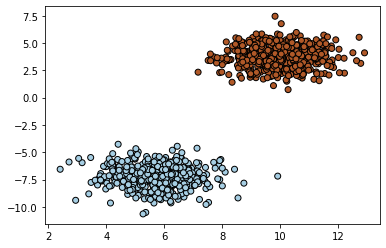

In [2]:
from sklearn import preprocessing
from sklearn import svm

# plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

In [3]:
#Standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.64692916, 1.04203174],
       [1.11940709, 1.03016037],
       [0.78096088, 1.1259762 ],
       ...,
       [2.08093595, 1.29671192],
       [0.93195784, 1.02185478],
       [0.36482513, 0.88923372]])

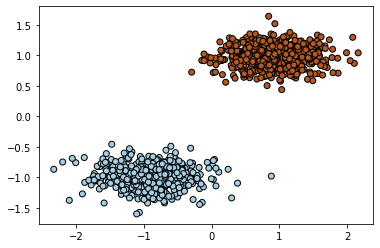

In [4]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

## SVM linéaire

### Données linéairement séparables

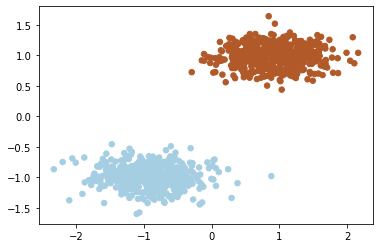

In [5]:
from sklearn import svm, metrics
from matplotlib import pyplot

#SVM à marge stricte (C=1000)
clf = svm.LinearSVC(C=1000)
clf.fit(X,y)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ypred = clf.predict(X_scaled)

In [6]:
#taux d’erreur
err_train = 1 - metrics.accuracy_score (ypred, y)
print("Train error: %.3f" % err_train)

Train error: 0.000


In [7]:
#matrice de confusion
metrics.confusion_matrix(y, ypred)

array([[500,   0],
       [  0, 500]], dtype=int64)

Nous avons aucune erreur, tous les exemples prédits sont dans leur réelle classe.

In [8]:
import numpy

# Création d'un mesh
h = .02 # Espacement du mesh
x_min, x_max = X_scaled[:, 0].min()*1.1, X_scaled[:, 0].max()*1.1
y_min, y_max = X_scaled[:, 1].min()*1.1, X_scaled[:, 1].max()*1.1
xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, h),
numpy.arange(y_min, y_max, h))

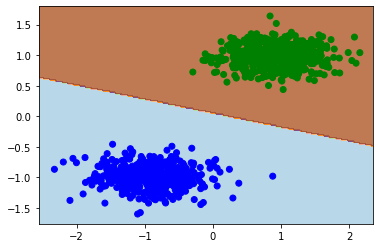

In [9]:
colors = numpy.array([x for x in "bgrcmyk"])
Y = clf.predict(numpy.c_[xx.ravel(), yy.ravel()])
Y = Y.reshape(xx.shape)
pyplot.contourf(xx, yy, Y, cmap=pyplot.cm.Paired, alpha=0.8)
pyplot.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap=pyplot.cm.Paired, color=colors[y].tolist())
pyplot.xlim(xx.min(), xx.max())
pyplot.ylim(yy.min(), yy.max())
pyplot.show()

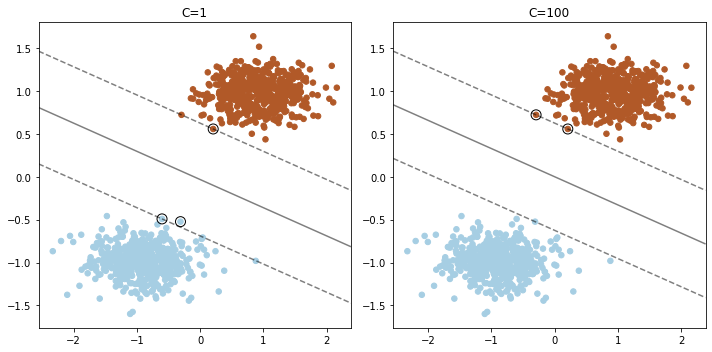

In [10]:
from sklearn.svm import LinearSVC
import numpy as np

plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X_scaled, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X_scaled)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
    support_vector_indices = np.where(
        np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X_scaled[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

### Données non linéairement séparables

In [11]:
X,y = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=clusters_std[1], center_box=(-10.0, 10.0))

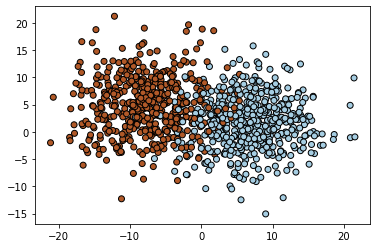

In [12]:
# plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

In [13]:
#Standardize data
scaler = StandardScaler()
X_scaled_bis = scaler.fit_transform(X)
X_scaled_bis

array([[ 1.13693968, -1.92453477],
       [ 0.91339661, -1.0189251 ],
       [ 0.97187235,  0.54651236],
       ...,
       [-0.76308149, -0.17615701],
       [-0.8091663 , -0.13999316],
       [ 0.40395198, -0.13983293]])

In [16]:
from sklearn import model_selection
from sklearn.model_selection import StratifiedShuffleSplit

#validation croisée
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
sss.get_n_splits(X_scaled_bis, y)

5

C:\Logiciels\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


ValueError: num must be 1 <= num <= 2, not 3

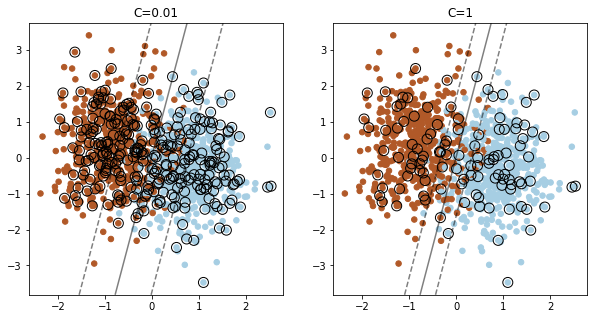

In [21]:
plt.figure(figsize=(10, 5))
for i, C in enumerate([1e-2, 1, 1e2]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X_scaled_bis, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X_train)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
    support_vector_indices = np.where(
        np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X_scaled_bis[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X_scaled_bis[:, 0], X_scaled_bis[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()